# Linear regression with one variable

Week2の一変数の線形回帰の課題について

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import sys, os
sys.path.append(os.path.dirname('../common/'))
from common import *

## Training data

In [2]:
train_frame = pd.read_csv("ex1data1.txt", names=('population', 'profit'))
train_frame.head(5)

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
m = len(train_frame['population'])
X = np.c_[np.ones((m, 1)), np.array(train_frame['population']).reshape(-1, 1)]
y = np.array(train_frame['profit']).reshape(-1, 1)

saved assets/week02_linreg_one_train.png


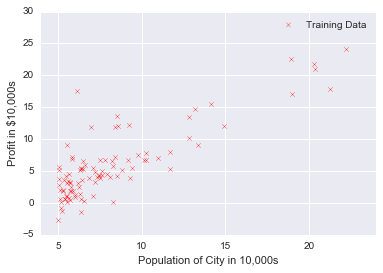

In [4]:
def plot_data():
    fig = plt.figure()
    plt.xlim(4, 24)
    plt.ylim(-5, 30)
    ax = fig.add_subplot(1,1,1)
    ax.scatter(X[:,1], y, color='red', marker='x', label='Training Data')
    ax.legend()
    ax.set_xlabel('Population of City in 10,000s')
    ax.set_ylabel('Profit in $10,000s')
    return ax

plot_data()
savefig('week02_linreg_one_train.png')

## Computing the cost J

In [5]:
%run linreg.py

In [6]:
n = X.shape[1]
initial_theta = np.zeros((n, 1))

cost_function(initial_theta, X, y)

32.072733877455676

## Gradient descent

In [7]:
iterations = 1500
alpha = 0.01
theta, J_history = gradient_descent(initial_theta, X, y, alpha, iterations)
theta

array([[-3.63029144],
       [ 1.16636235]])

saved assets/week02_linreg_one_cost_history.png


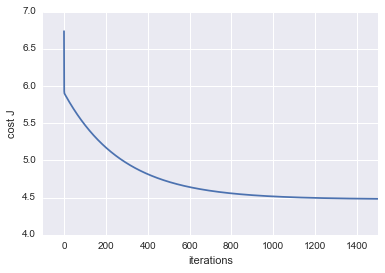

In [8]:
fig = plt.figure()
plt.xlim(-100, iterations)
ax = fig.add_subplot(1,1,1)
ax.plot(J_history)
ax.set_xlabel('iterations')
ax.set_ylabel('cost J')
savefig('week02_linreg_one_cost_history.png')

## Prediction

In [9]:
predict1 = np.dot(np.array([1, 3.5]), theta)
predict2 = np.dot(np.array([1, 7]), theta)
predict1 * 10000, predict2 * 10000

(array([ 4519.7678677]), array([ 45342.45012945]))

saved assets/week02_linreg_one_pred.png


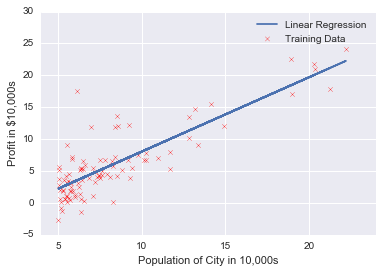

In [10]:
ypreds = predict(theta, X)

ax = plot_data()
ax.plot(X[:,1], ypreds, label='Linear Regression')
ax.legend()
savefig('week02_linreg_one_pred.png')

## Visualizing the cost J

In [11]:
gridsize = 100
ts0, ts1 = np.meshgrid(np.linspace(-10, 10, gridsize), np.linspace(-1, 4, gridsize))

js = np.zeros((gridsize, gridsize))
for i in range(gridsize):
    for j in range(gridsize):
        t = np.array([ts0[i, j], ts1[i, j]]).reshape(2, 1)
        js[i, j] = cost_function(t, X, y)

In [12]:
cost_function(theta, X, y), np.min(js) # Jの検算

(4.483388256587725, 4.4804593918933131)

saved assets/week02_linreg_one_cost_3d.png


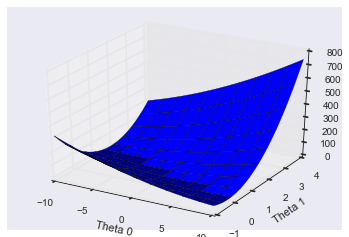

In [13]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(ts0, ts1, js)
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
savefig('week02_linreg_one_cost_3d.png')

saved assets/week02_linreg_one_cost_scatter.png


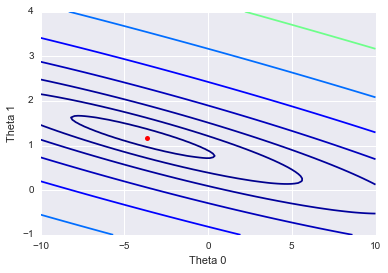

In [14]:
fig = plt.figure()
plt.jet()

ax = fig.add_subplot(1,1,1)
ax.contour(ts0, ts1, js, np.logspace(-3, 3, 20)) # 最後の引数は等高線の間隔
ax.plot(theta[0], theta[1], 'k.', color='red', markersize='10') # Jを最小化するThetaをプロット
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
savefig('week02_linreg_one_cost_scatter.png')

## Normal Equations

In [18]:
# theta = (X^T * X)^-1 * X^T * y
theta2 = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)

theta, theta2

(array([[-3.63029144],
        [ 1.16636235]]), array([[-3.89578088],
        [ 1.19303364]]))